<b>Importing Necessary Libraries </b>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras.utils import to_categorical
import seaborn as sns
# from numpy import mean
# from numpy import std
# from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
# from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from keras.callbacks import EarlyStopping

<b> Loading the Dataset </b>

In [4]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data() 

<b> Visualization Graph (1) </b>

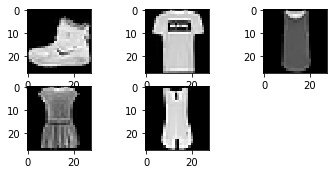

In [5]:
for i in range(5):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))
plt.show()

In [6]:
print(X_train.shape) # shape of X_train
print(Y_train.shape) # shape of X_test
print(X_test.shape) # shape of Y_train
print(Y_test.shape) # shape of Y_test

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


<b> Visualization Graph (2): Normalized Images</b>

In [7]:
X_copy = X_train
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))


In [8]:
X_copy = X_copy/255.0

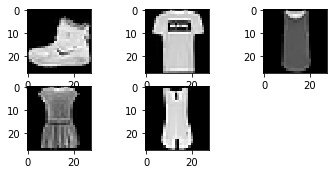

In [9]:
for i in range(5):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_copy[i], cmap = plt.get_cmap('gray'))
plt.show()

<b> Visualization Graph (3): Count with respect to each label</b>

In [10]:
train = pd.read_csv(r"C:\Users\udbha\Downloads\archive\fashion-mnist_train.csv")
test = pd.read_csv(r"C:\Users\udbha\Downloads\archive\fashion-mnist_test.csv")

In [11]:
train.head(4)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0


In [12]:
test.head(4)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0


In [13]:
clothing_items = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
        5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

Text(0.5, 1.0, 'Training Label Count')

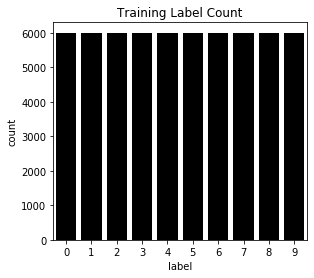

In [14]:
#Clothing Item Label count: Train
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.countplot(train['label'], palette=['#000000' for i in range(10)])
plt.title('Training Label Count')

Text(0.5, 1.0, 'Test Label Count')

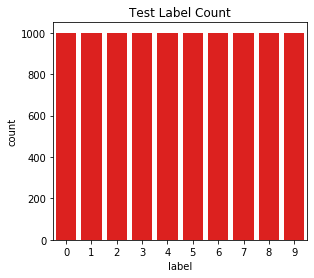

In [15]:
#Clothing Item Label count: Test
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.countplot(test['label'], palette=['#fb0200' for i in range(10)])
plt.title('Test Label Count')

In [16]:
#conversion of labels to categorical data [0,9]
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [17]:
# making sure that the format for training data and test data is
# in the right format
X_train = X_train.astype('float32')
Y_train = Y_train.astype('float32')
X_test = X_test.astype('float32')
Y_test = Y_test.astype('float32')

In [18]:
#normalizing the data before we feed it into our model
X_train = X_train/255.0
X_test = X_test/255.0

In [19]:
Y_test.shape

(10000, 10)

<b>Building our CNN and Importing necessary libraries for it </b>

NOTE: We have added batchnormalization and early stopping in our model. Rest of the two methods which are Learning Rate Scheduler and Regularization is done seperately

In [21]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from livelossplot import PlotLossesKeras 
# '''Livelossplot # this special library gives us the graph in real time while the epochs are going on
#     ~to download this library we use '!pip install livelossplot

In [22]:
#early stopping 
es = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience=5)

In [23]:
X_train.shape

(60000, 28, 28, 1)

<b>Building the first Model </b> : This Includes Batch Normalization

In [17]:
model1 = Sequential()
model1.add(Conv2D(32,(3,3), padding = 'same',
                  activation = 'relu',input_shape = (28,28,1)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(2,2))
model1.add(Flatten())
model1.add(Dense(100, activation = 'relu'))
model1.add(BatchNormalization())
model1.add(Dense(10, activation = 'softmax'))

optimizer = SGD(learning_rate=0.01, momentum=0.8)
model1.compile(optimizer=optimizer, loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

<b> Results for Model 1 </b>

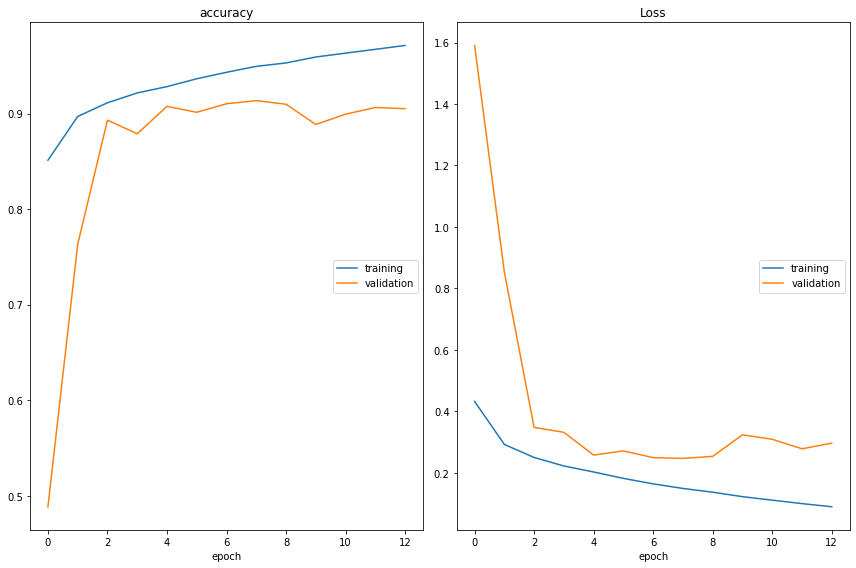

accuracy
	training         	 (min:    0.851, max:    0.971, cur:    0.971)
	validation       	 (min:    0.488, max:    0.914, cur:    0.905)
Loss
	training         	 (min:    0.090, max:    0.432, cur:    0.090)
	validation       	 (min:    0.247, max:    1.590, cur:    0.296)
188/188 [==============================] - 13s 70ms/step - loss: 0.0895 - accuracy: 0.9714 - val_loss: 0.2964 - val_accuracy: 0.9052
Epoch 00013: early stopping


In [18]:
model1.fit(X_train, Y_train, batch_size=256, epochs = 100, validation_split=0.2, callbacks = [PlotLossesKeras(), es], verbose = 1)

In [19]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 100)               627300    
                                                                 
 batch_normalization_1 (Batc  (None, 100)              4

# END OF PART 3

# --------------------------------------------------------------------------------------------------------------

# PART 4 

<b>Setup 1 : Dropout Layer Introduced with KeepProb 80% </b>

In [24]:
from keras.layers import Dropout # importing dropout 

In [41]:
model2 = Sequential()
model2.add(Dropout(0.2,input_shape =(28,28,1) ))
model2.add(Conv2D(32,(3,3), padding = 'same',
                  activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(2,2))
model2.add(Flatten())
model2.add(Dense(100, activation = 'relu'))
model2.add(BatchNormalization())
model2.add(Dense(10, activation = 'softmax'))

optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

<b> Results for Setup 1 </b>

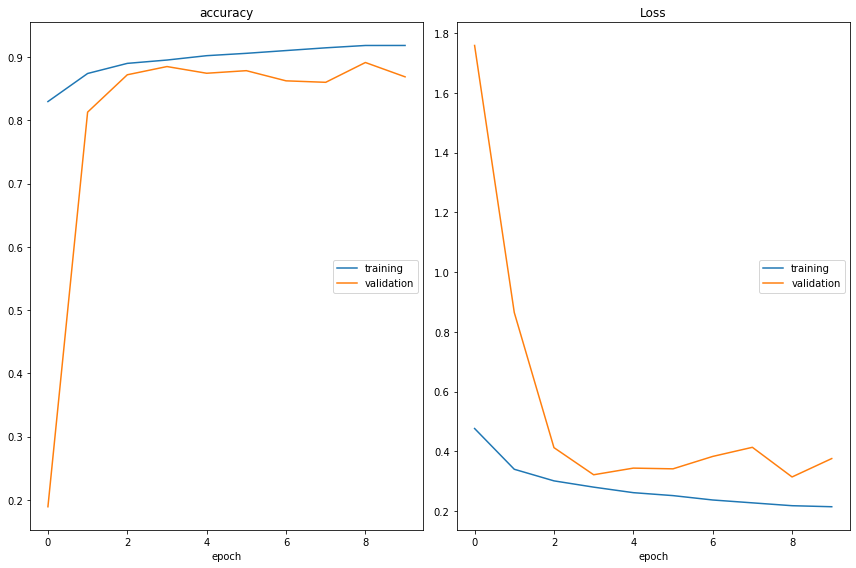

accuracy
	training         	 (min:    0.830, max:    0.919, cur:    0.919)
	validation       	 (min:    0.189, max:    0.892, cur:    0.869)
Loss
	training         	 (min:    0.214, max:    0.476, cur:    0.214)
	validation       	 (min:    0.314, max:    1.759, cur:    0.376)

188/188 [==============================] - 13s 67ms/step - loss: 0.2143 - accuracy: 0.9186 - val_loss: 0.3756 - val_accuracy: 0.8690


In [42]:
model2.fit(X_train, Y_train, batch_size=256, epochs = 10, validation_split=0.2, callbacks = [PlotLossesKeras()], verbose = 1)

In [213]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 28, 28, 1)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_12 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 6272)              0         
                                                                 
 dense_14 (Dense)            (None, 100)              

<b> Setup 2: Changing the Optimizer </b>

In [43]:
model3 = Sequential()

model3.add(Conv2D(32,(3,3), padding = 'same',
                  activation = 'relu', input_shape =(28,28,1) ))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(2,2))
model3.add(Flatten())
model3.add(Dense(100, activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dense(10, activation = 'softmax'))

optimizer = SGD(learning_rate=0.001, momentum=0.9)
model3.compile(optimizer=optimizer, loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

<b> Results for Setup 2 </b>

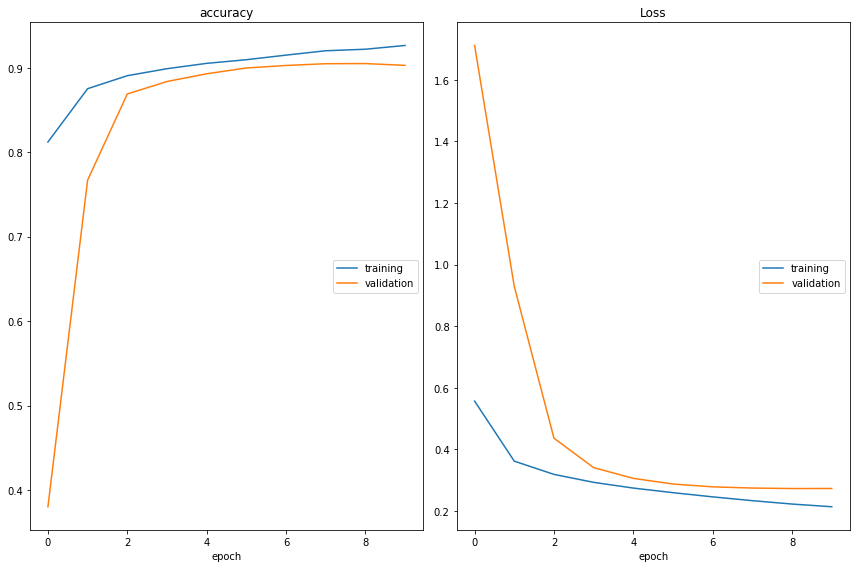

accuracy
	training         	 (min:    0.812, max:    0.926, cur:    0.926)
	validation       	 (min:    0.380, max:    0.905, cur:    0.903)
Loss
	training         	 (min:    0.214, max:    0.557, cur:    0.214)
	validation       	 (min:    0.273, max:    1.712, cur:    0.273)

188/188 [==============================] - 12s 64ms/step - loss: 0.2139 - accuracy: 0.9264 - val_loss: 0.2731 - val_accuracy: 0.9028


In [44]:
model3.fit(X_train, Y_train, batch_size=256, epochs = 10, validation_split=0.2, callbacks = [PlotLossesKeras()], verbose = 1)

In [212]:
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_14 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 6272)              0         
                                                                 
 dense_16 (Dense)            (None, 100)               627300    
                                                                 
 batch_normalization_15 (Bat  (None, 100)             

<b> Setup 3: Changing the Activation Functions </b>

In [45]:
model4 = Sequential()

model4.add(Conv2D(32,(3,3), padding = 'same',
                  activation = 'sigmoid', input_shape =(28,28,1) ))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(2,2))
model4.add(Flatten())
model4.add(Dense(100, activation = 'sigmoid'))
model4.add(BatchNormalization())
model4.add(Dense(10, activation = 'softmax'))

optimizer = Adam(learning_rate=0.001)
model4.compile(optimizer=optimizer, loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

<b> Results for Setup 3 </b>

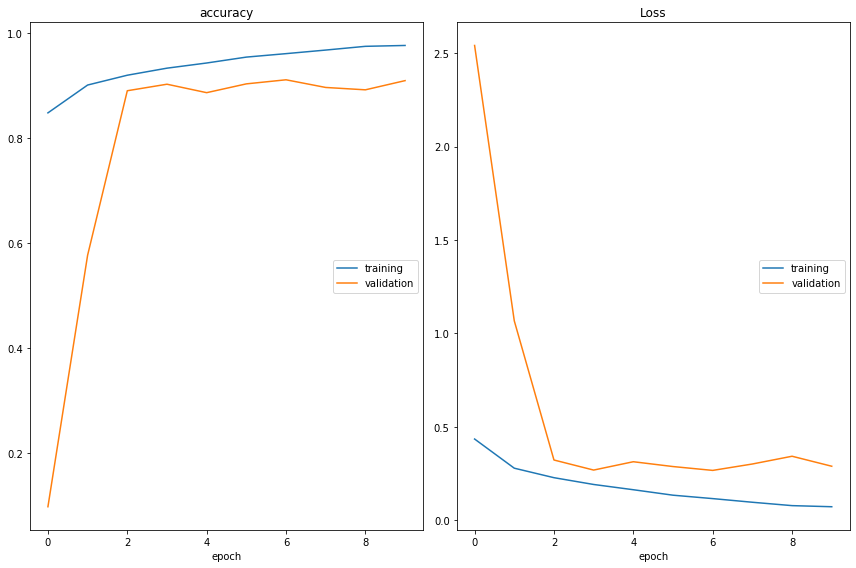

accuracy
	training         	 (min:    0.848, max:    0.976, cur:    0.976)
	validation       	 (min:    0.098, max:    0.911, cur:    0.909)
Loss
	training         	 (min:    0.071, max:    0.434, cur:    0.071)
	validation       	 (min:    0.266, max:    2.542, cur:    0.288)

188/188 [==============================] - 13s 71ms/step - loss: 0.0715 - accuracy: 0.9762 - val_loss: 0.2884 - val_accuracy: 0.9093


In [46]:
model4.fit(X_train, Y_train, batch_size=256, epochs = 10, validation_split=0.2, callbacks = [PlotLossesKeras()], verbose = 1)

In [211]:
model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_16 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 6272)              0         
                                                                 
 dense_18 (Dense)            (None, 100)               627300    
                                                                 
 batch_normalization_17 (Bat  (None, 100)             

<b> Setup 4: Changing the Initializer : The default is Glorot. We change it to Random Normal </b>

In [52]:
model5 = Sequential()

model5.add(Conv2D(32,(3,3), padding = 'same',
                  activation = 'relu', input_shape =(28,28,1) ))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(2,2))
model5.add(Flatten())
model5.add(Dense(100, activation = 'relu', kernel_initializer = 'random_normal'))
model5.add(BatchNormalization())
model5.add(Dense(10, activation = 'softmax'))

optimizer = Adam(learning_rate=0.001)
model5.compile(optimizer=optimizer, loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

<b> Results for Setup 4 </b>

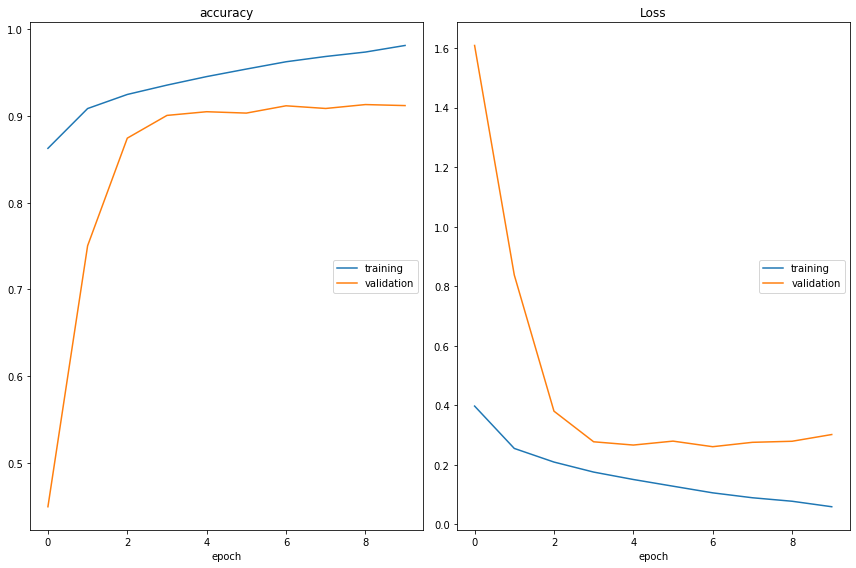

accuracy
	training         	 (min:    0.863, max:    0.982, cur:    0.982)
	validation       	 (min:    0.449, max:    0.913, cur:    0.912)
Loss
	training         	 (min:    0.059, max:    0.397, cur:    0.059)
	validation       	 (min:    0.261, max:    1.609, cur:    0.302)

188/188 [==============================] - 13s 67ms/step - loss: 0.0593 - accuracy: 0.9815 - val_loss: 0.3019 - val_accuracy: 0.9122


In [53]:
model5.fit(X_train, Y_train, batch_size=256, epochs = 10, validation_split=0.2, callbacks = [PlotLossesKeras()], verbose = 1)

In [210]:
model5.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_23 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 6272)              0         
                                                                 
 dense_25 (Dense)            (None, 100)               627300    
                                                                 
 batch_normalization_24 (Bat  (None, 100)            

<b> Setup 5: Changing the Kernel Size: From 3x3 ---> 9x9 </b>

In [54]:
model6 = Sequential()

model6.add(Conv2D(32,(9,9), padding = 'same',
                  activation = 'relu', input_shape =(28,28,1) ))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(2,2))
model6.add(Flatten())
model6.add(Dense(100, activation = 'relu'))
model6.add(BatchNormalization())
model6.add(Dense(10, activation = 'softmax'))

optimizer = Adam(learning_rate=0.001)
model6.compile(optimizer=optimizer, loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

<b> Results for Setup 5 </b>

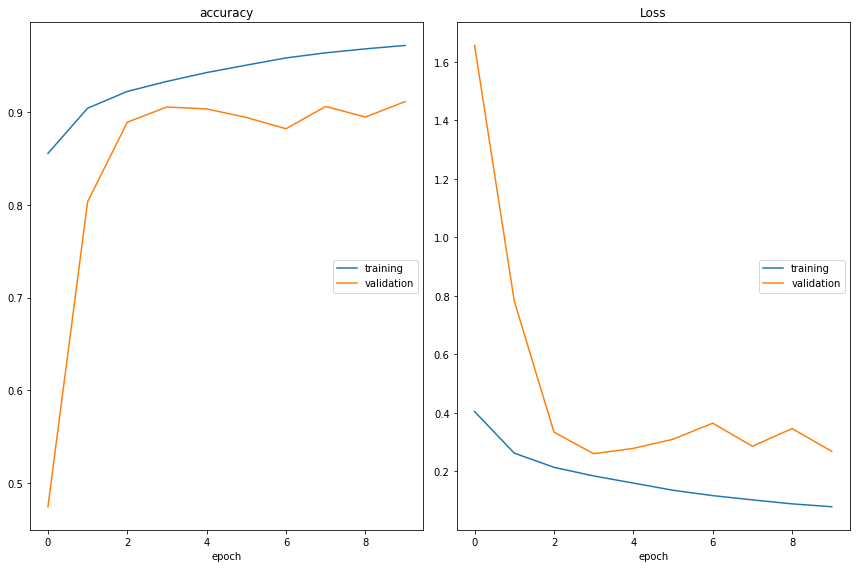

accuracy
	training         	 (min:    0.855, max:    0.972, cur:    0.972)
	validation       	 (min:    0.475, max:    0.911, cur:    0.911)
Loss
	training         	 (min:    0.079, max:    0.404, cur:    0.079)
	validation       	 (min:    0.260, max:    1.656, cur:    0.268)

188/188 [==============================] - 17s 93ms/step - loss: 0.0790 - accuracy: 0.9717 - val_loss: 0.2685 - val_accuracy: 0.9112


In [55]:
model6.fit(X_train, Y_train, batch_size=256, epochs = 10, validation_split=0.2, callbacks = [PlotLossesKeras()], verbose = 1)

In [209]:
model6.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        2624      
                                                                 
 batch_normalization_25 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 6272)              0         
                                                                 
 dense_27 (Dense)            (None, 100)               627300    
                                                                 
 batch_normalization_26 (Bat  (None, 100)            

<b> Setup 6: Changing the Padding Size </b>

In [25]:
from keras.layers import ZeroPadding2D

In [57]:
model7 = Sequential()

model7.add(ZeroPadding2D(padding = (2,2)))
model7.add(Conv2D(32,(9,9), padding = 'same',
                  activation = 'relu', input_shape =(28,28,1) ))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(2,2))
model7.add(Flatten())
model7.add(Dense(100, activation = 'relu'))
model7.add(BatchNormalization())
model7.add(Dense(10, activation = 'softmax'))

optimizer = Adam(learning_rate=0.001)
model7.compile(optimizer=optimizer, loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

<b> Results for Setup 6 </b>

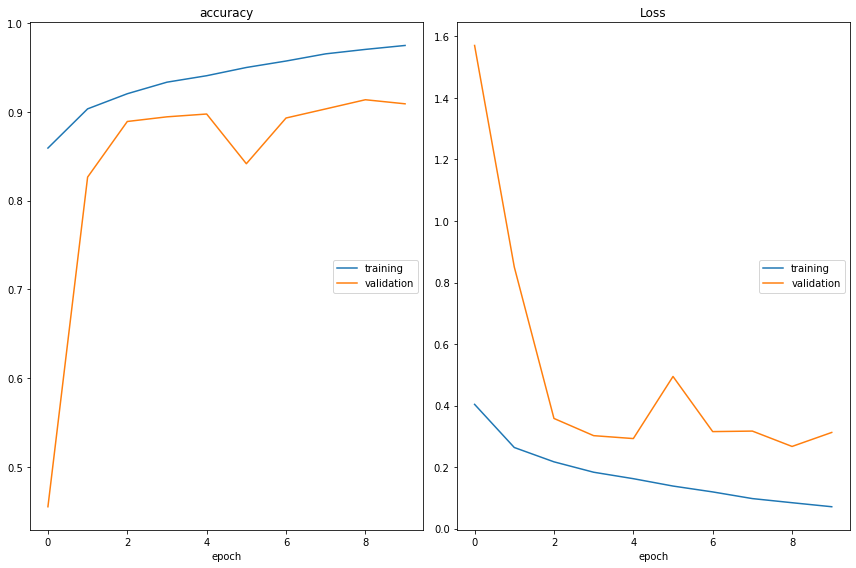

accuracy
	training         	 (min:    0.859, max:    0.975, cur:    0.975)
	validation       	 (min:    0.455, max:    0.914, cur:    0.909)
Loss
	training         	 (min:    0.071, max:    0.404, cur:    0.071)
	validation       	 (min:    0.267, max:    1.571, cur:    0.313)

188/188 [==============================] - 22s 116ms/step - loss: 0.0710 - accuracy: 0.9748 - val_loss: 0.3126 - val_accuracy: 0.9091


In [58]:
model7.fit(X_train, Y_train, batch_size=256, epochs = 10, validation_split=0.2, callbacks = [PlotLossesKeras()], verbose = 1)

In [208]:
model7.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 32, 32, 1)        0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        2624      
                                                                 
 batch_normalization_27 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 8192)              0         
                                                     

# Data Augmentation 

In [61]:
(X_aug, Y_aug), (X_t, Y_t) = fashion_mnist.load_data() 

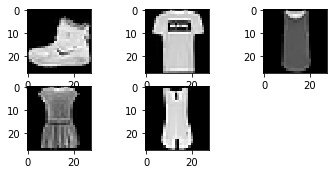

In [62]:
for i in range(5):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_aug[i], cmap = plt.get_cmap('gray'))
plt.show()

<b> Data Augmentation(1): FLIP from left to right </b>

In [132]:
#implementing a function for flipping the image left to right
def left_to_right(img_data):
    result = np.zeros((60000,28,28))
    for i in range(img_data.shape[0]):
        flip = np.fliplr(img_data[i])
        result[i] = flip
    return result

In [138]:
flipped = left_to_right(X_aug)

<b> Results for Flipping Left to Right </b>

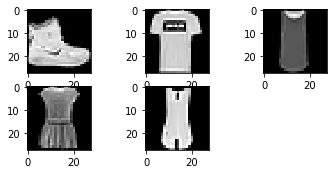

In [139]:
for i in range(5):
    plt.subplot(330 + 1 + i)
    plt.imshow(flipped[i], cmap = plt.get_cmap('gray'))
plt.show()

<b> Data Augmentation(2): Rotate 90 </b>

In [141]:
def rot90(img_data):
    result = np.zeros((60000,28,28))
    for i in range(img_data.shape[0]):
        rot = np.rot90(img_data[i])
        result[i] = rot
    return result




In [142]:
rotate_90 = rot90(X_aug)

<b> Results for Rotating Image </b>

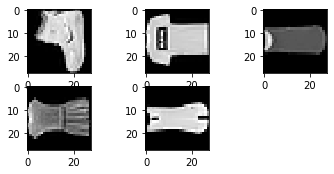

In [149]:
for i in range(5):
    plt.subplot(330 + 1 + i)
    plt.imshow(rotate_90[i], cmap = plt.get_cmap('gray'))
plt.show()

<b> Data Augmentation Method(3): Shearing the Image </b>

In [ ]:
from scipy import ndimage # importing library for images

In [201]:
#implementing shear function from scratch 
def shear(img_data):
    result = np.zeros((60000,28,28))
    height,width = 28,28
    transform = [[1,0.2,0],
            [0.2, 1, 0],
             [0,0,1]]
    for i in range(img_data.shape[0]):
        sheared_image = ndimage.affine_transform(img_data[i],transform, 
                                                 offset=(0, -height//2))
        result[i] = sheared_image
    return result

In [202]:
shear_img = shear(X_aug)

<b> Results for Shearing the Image </b>

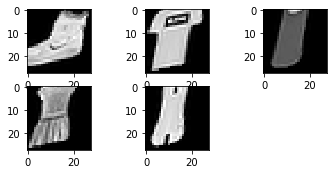

In [203]:
for i in range(5):
    plt.subplot(330 + 1 + i)
    plt.imshow(shear_img[i], cmap = plt.get_cmap('gray'))
plt.show()

<b> Data Augmentation Method(4): Scaling the Image </b>

In [205]:
# implementing scaling function from scratch
def scale(img_data):
    result = np.zeros((60000,28,28))
    height,width = 28,28
    transform = [[1.5,0,0],
            [0, 1.5, 0],
             [0,0,1]]
    for i in range(img_data.shape[0]):
        scaled_image = ndimage.affine_transform(img_data[i],transform, 
                                                 offset=(0, -height//2))
        result[i] = scaled_image
    return result

In [206]:
scaled = scale(X_aug)

<b> Results for Scaled Images </b>

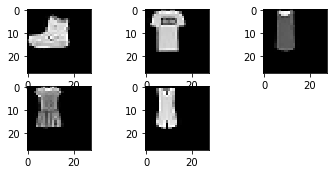

In [207]:
for i in range(5):
    plt.subplot(330 + 1 + i)
    plt.imshow(scaled[i], cmap = plt.get_cmap('gray'))
plt.show()

# Learning Rate Scheduler

In [35]:
from keras.callbacks import LearningRateScheduler
import math

In [36]:
def decay(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr*tf.math.exp(-0.1)
    

In [37]:
learn_rate = LearningRateScheduler(decay)

In [38]:
modellrs = Sequential()

modellrs.add(Conv2D(32,(3,3), padding = 'same',
                  activation = 'relu', input_shape =(28,28,1) ))
modellrs.add(BatchNormalization())
modellrs.add(MaxPooling2D(2,2))
modellrs.add(Flatten())
modellrs.add(Dense(100, activation = 'relu'))
modellrs.add(BatchNormalization())
modellrs.add(Dense(10, activation = 'softmax'))

optimizer = SGD(learning_rate=0.01, momentum=0.9)
modellrs.compile(optimizer=optimizer, loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

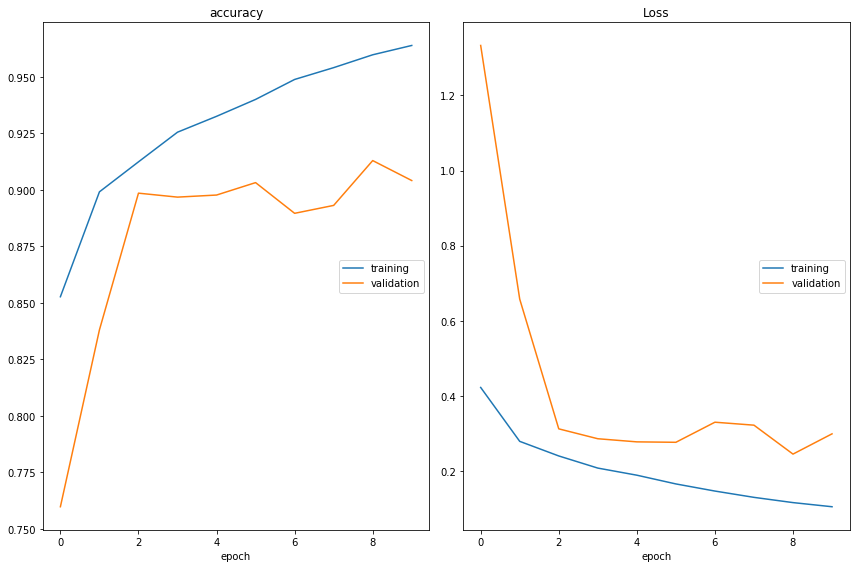

accuracy
	training         	 (min:    0.853, max:    0.964, cur:    0.964)
	validation       	 (min:    0.760, max:    0.913, cur:    0.904)
Loss
	training         	 (min:    0.105, max:    0.423, cur:    0.105)
	validation       	 (min:    0.245, max:    1.333, cur:    0.299)

188/188 [==============================] - 13s 67ms/step - loss: 0.1049 - accuracy: 0.9639 - val_loss: 0.2990 - val_accuracy: 0.9042 - lr: 0.0100


In [39]:
modellrs.fit(X_train, Y_train, batch_size=256, epochs = 10, validation_split=0.2, callbacks = [PlotLossesKeras(),learn_rate], verbose = 1)

# Regularization: L2 

In [43]:
from keras.regularizers import l2

In [44]:
modelreg = Sequential()

modelreg.add(Conv2D(32,(3,3), padding = 'same',
                  activation = 'relu', input_shape =(28,28,1) ))
modelreg.add(BatchNormalization())
modelreg.add(Dense(256, kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01)))
modelreg.add(MaxPooling2D(2,2))
modelreg.add(Flatten())
modelreg.add(Dense(100, activation = 'relu'))
modelreg.add(BatchNormalization())
modelreg.add(Dense(10, activation = 'softmax'))

optimizer = SGD(learning_rate=0.01, momentum=0.9)
modelreg.compile(optimizer=optimizer, loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

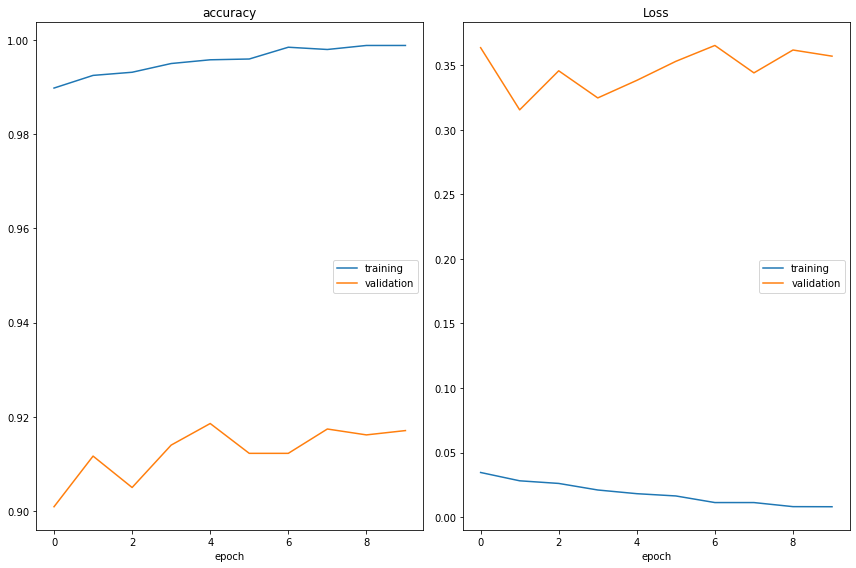

accuracy
	training         	 (min:    0.990, max:    0.999, cur:    0.999)
	validation       	 (min:    0.901, max:    0.919, cur:    0.917)
Loss
	training         	 (min:    0.008, max:    0.035, cur:    0.008)
	validation       	 (min:    0.315, max:    0.365, cur:    0.357)

188/188 [==============================] - 12s 65ms/step - loss: 0.0080 - accuracy: 0.9988 - val_loss: 0.3570 - val_accuracy: 0.9171


In [45]:
modellrs.fit(X_train, Y_train, batch_size=256, epochs = 10, validation_split=0.2, callbacks = [PlotLossesKeras()], verbose = 1)

# END OF PART 4 

# Bonus

In [108]:
class Perceptron:
    
    def __init__(self, learning_rate = 0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.activation_func = self.unit_step_func
        self.weights = None
        self.bias = None
        
    def fit(self,X,y):
        m, n = X.shape
        
        self.weights = np.zeros(n)
        self.bias = 0
        y_ = np.array([1 if i>0 else 0 for i in y])
        
        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_out = np.dot(x_i,self.weights) + self.bias
                y_predicted = self.activation_func(linear_out)
                
                update = self.learning_rate*(y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
        
    def predict(self,X):
        
        linear_out = np.dot(X,self.weights) + self.bias
        y_predicted = self.activation_func(linear_out)
        return y_predicted
        
    def unit_step_func(self,x):
        return np.where(x>=0, 1, 0)